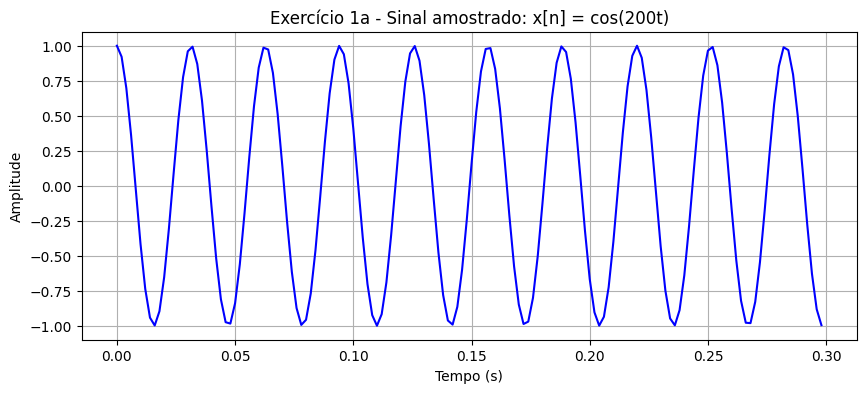

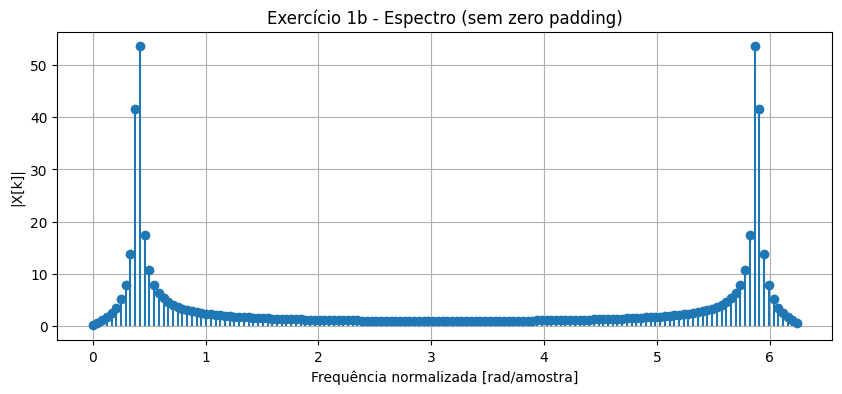

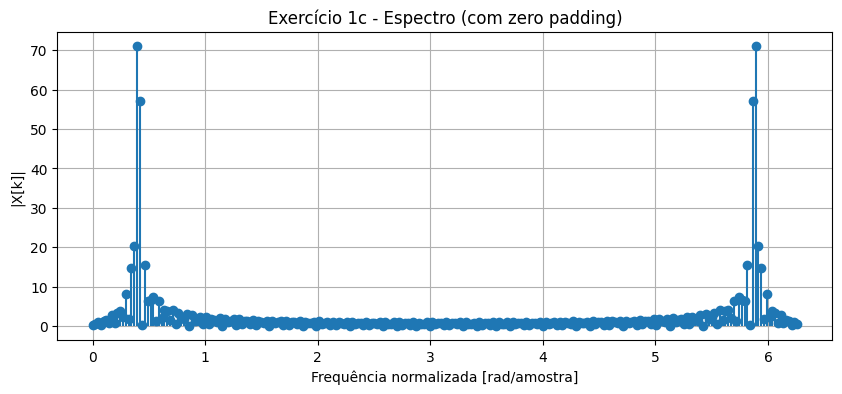

Exercício 1d/e - Picos sem zero padding:
Índices = [ 10 140]
Frequências (Hz) = [ 33.33333333 466.66666667]

Exercício 1f/g - Picos com zero padding:
Índices = [ 16 240]
Frequências (Hz) = [ 31.25 468.75]

Exercício 1h - Frequência esperada pela FT contínua = 31.830988618379067 Hz


In [1]:
# ========================
# Exercício 1 - DFT e FFT
# ========================
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
fs = 500         # taxa de amostragem (Hz)
T = 0.3          # duração do sinal (s)
t = np.arange(0, T, 1/fs)  # vetor de tempo
x = np.cos(200*t)  # sinal amostrado

# (a) Gráfico do sinal no tempo
plt.figure(figsize=(10,4))
plt.plot(t, x, 'b')
plt.title("Exercício 1a - Sinal amostrado: x[n] = cos(200t)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# (b) FFT sem zero padding
X = np.fft.fft(x)
N = len(X)
w = np.linspace(0, 2*np.pi, N, endpoint=False)  # frequência normalizada

plt.figure(figsize=(10,4))
plt.stem(w, np.abs(X), basefmt=" ")
plt.title("Exercício 1b - Espectro (sem zero padding)")
plt.xlabel("Frequência normalizada [rad/amostra]")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

# (c) FFT com zero padding (até próxima potência de 2)
N2 = 2**int(np.ceil(np.log2(len(x))))   # próxima potência de 2
xzp = np.pad(x, (0, N2 - len(x)))       # padding com zeros
Xzp = np.fft.fft(xzp)
w2 = np.linspace(0, 2*np.pi, N2, endpoint=False)

plt.figure(figsize=(10,4))
plt.stem(w2, np.abs(Xzp), basefmt=" ")
plt.title("Exercício 1c - Espectro (com zero padding)")
plt.xlabel("Frequência normalizada [rad/amostra]")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

# (d,e) Picos sem zero padding
idx_peaks = np.argsort(np.abs(X))[-2:]        # pega os dois maiores
freqs = idx_peaks * fs / N                    # converte para Hz
print("Exercício 1d/e - Picos sem zero padding:")
print("Índices =", idx_peaks)
print("Frequências (Hz) =", freqs)

# (f,g) Picos com zero padding
idx_peaks_zp = np.argsort(np.abs(Xzp))[-2:]
freqs_zp = idx_peaks_zp * fs / N2
print("\nExercício 1f/g - Picos com zero padding:")
print("Índices =", idx_peaks_zp)
print("Frequências (Hz) =", freqs_zp)

# (h) Frequência esperada pela Transformada de Fourier contínua
# x(t) = cos(200t) -> frequência analógica = 200 rad/s
f_teorico = 200 / (2*np.pi)   # Hz
print("\nExercício 1h - Frequência esperada pela FT contínua =", f_teorico, "Hz")


## Exercício 1 – Respostas (d até h)

**(d)**  
- Picos (sem zero padding, N=150): k = 10 e k = 140  
- Há dois picos principais porque o cosseno é um sinal real → gera duas componentes simétricas em +f e −f.

**(e)**  
- Frequências correspondentes:  
  - k=10 → 33,33 Hz  
  - k=140 → 466,67 Hz (equivalente a −33,33 Hz)  
- Os picos estão nesses valores porque a resolução da DFT é Δf = fs/N ≈ 3,33 Hz. O sinal real tem frequência em 31,83 Hz, mas o pico cai no bin mais próximo.

**(f)**  
- Picos (com zero padding, N=256): k = 16 e k = 240  
- Continuam aparecendo dois picos principais devido à simetria espectral do cosseno.

**(g)**  
- Frequências correspondentes:  
  - k=16 → 31,25 Hz  
  - k=240 → 468,75 Hz (equivalente a −31,25 Hz)  
- Com zero padding a resolução melhora (Δf = 1,95 Hz) e o pico fica mais próximo da frequência real.

**(h)**  
- Frequência teórica pela Transformada de Fourier:  
  f = 200 / (2π) ≈ **31,83 Hz**  
- Esse valor difere do obtido nas FFTs porque:  
  - a janela de observação é curta (T = 0,3 s), limitando a resolução em frequência;  
  - a DFT só mostra frequências múltiplas de Δf.  
- A estimativa de (g) é mais precisa que a de (e).  
- A precisão pode ser melhorada aumentando T (mais amostras), usando janelas adequadas e interpolação espectral.


Exercício 2a - Resultados iguais?
True


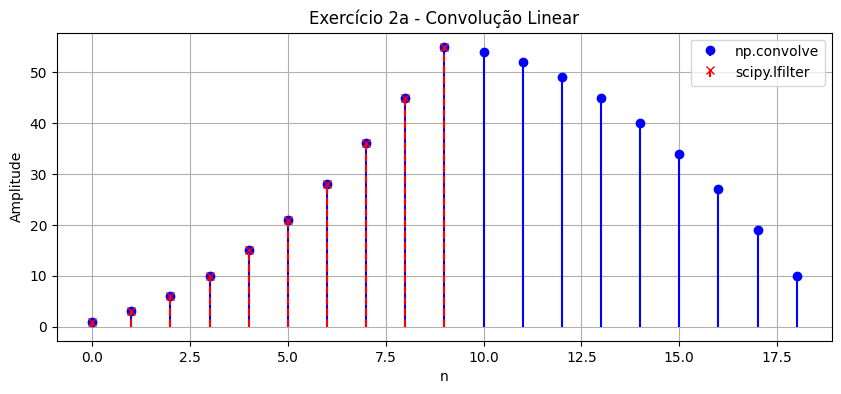


Exercício 2b - Resultados iguais com FFT?
True


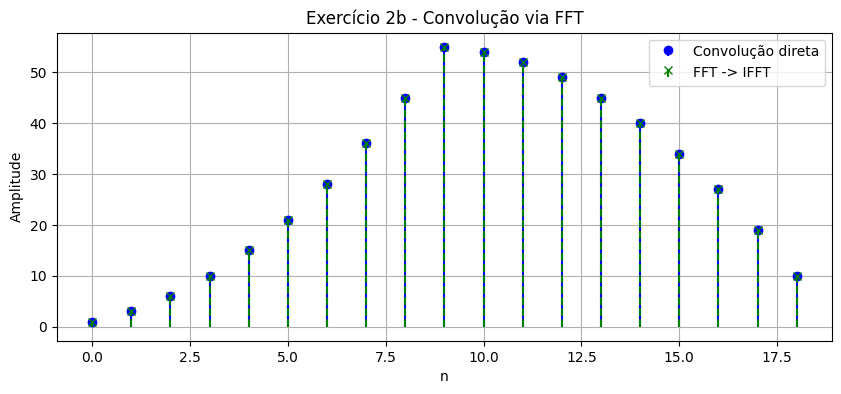

In [ ]:
# ========================
# Exercício 2 - Convolução
# ========================
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, lfilter

# Sinais dados
x = np.ones(10)                     # x[n] = 10 amostras unitárias
h = np.arange(1, 11)                # h[n] = [1,2,3,...,10]

# (a) Convolução usando np.convolve
y_conv = np.convolve(x, h)

# (a) Convolução usando scipy.signal.lfilter
# Lembrando que lfilter faz: y = lfilter(b, a, x), aqui a=[1], b=h
y_filter = lfilter(h, [1], x)

print("Exercício 2a - Resultados iguais?")
print(np.allclose(y_conv[:len(y_filter)], y_filter))

# Plotando resultados
plt.figure(figsize=(10,4))
plt.stem(y_conv, linefmt='b-', markerfmt='bo', basefmt=" ", label="np.convolve")
plt.stem(y_filter, linefmt='r--', markerfmt='rx', basefmt=" ", label="scipy.lfilter")
plt.title("Exercício 2a - Convolução Linear")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# (b) Convolução via FFT
N = len(x) + len(h) - 1            # comprimento da convolução linear
X = np.fft.fft(x, N)
H = np.fft.fft(h, N)
Y = X * H
y_fft = np.fft.ifft(Y).real        # resultado no tempo (parte real)

print("\nExercício 2b - Resultados iguais com FFT?")
print(np.allclose(y_conv, y_fft))

# Plotando comparação
plt.figure(figsize=(10,4))
plt.stem(y_conv, linefmt='b-', markerfmt='bo', basefmt=" ", label="Convolução direta")
plt.stem(y_fft, linefmt='g--', markerfmt='gx', basefmt=" ", label="FFT -> IFFT")
plt.title("Exercício 2b - Convolução via FFT")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

**(a)** Convolução via `np.convolve` e via `scipy.signal.lfilter`  
- `np.convolve(x, h)` realiza a **convolução linear completa** e retorna um vetor de comprimento `N + M - 1` (aqui `10 + 10 - 1 = 19`).  
- `lfilter(h, [1], x)` aplica o FIR com coeficientes `h` sobre a entrada `x`. Como `lfilter` processa o sinal causal de entrada de tamanho `N`, sua saída tem tamanho `N` (aqui 10).  
- Por causa disso **a saída de `lfilter` corresponde às primeiras `N` amostras** da convolução completa (`np.convolve`). Para comparar corretamente com `np.convolve` devemos comparar os primeiros `len(x)` elementos (ou usar `lfilter` com um sinal `x` zero-padded se quisermos toda a saída).  
- No código foi verificado `np.allclose(y_conv[:len(y_filter)], y_filter)` e o resultado é `True`, confirmando que as amostras coincidem onde esperado.

**(b)** Convolução via FFT (multiplicação no domínio da frequência)  
- Ao calcular a FFT com tamanho `N = len(x) + len(h) - 1`, multiplicar espectros e aplicar IFFT, obtemos a **convolução linear completa** (mesmo que `np.convolve`).  
- A comparação `np.allclose(y_conv, y_fft)` também retorna `True` (com pequenas diferenças numéricas muito pequenas devido a erros de ponto flutuante), mostrando que o método no domínio da frequência é matematicamente equivalente.

**Observações finais**
- `lfilter` é eficiente e natural para filtrar sinais em tempo real (saída só depende das amostras passadas).  
- A convolução por FFT (`np.fft`) fica vantajosa para sinais longos ou filtros longos (complexidade ~O(N log N) em vez de O(N·M)). Para uso prático existe `scipy.signal.fftconvolve` e implementações overlap-add/overlap-save para sinais grandes.  
- Sempre preste atenção ao **comprimento** esperado da saída ao comparar métodos: `full` (convolução completa) vs `same` vs `valid` são conceitos importantes.



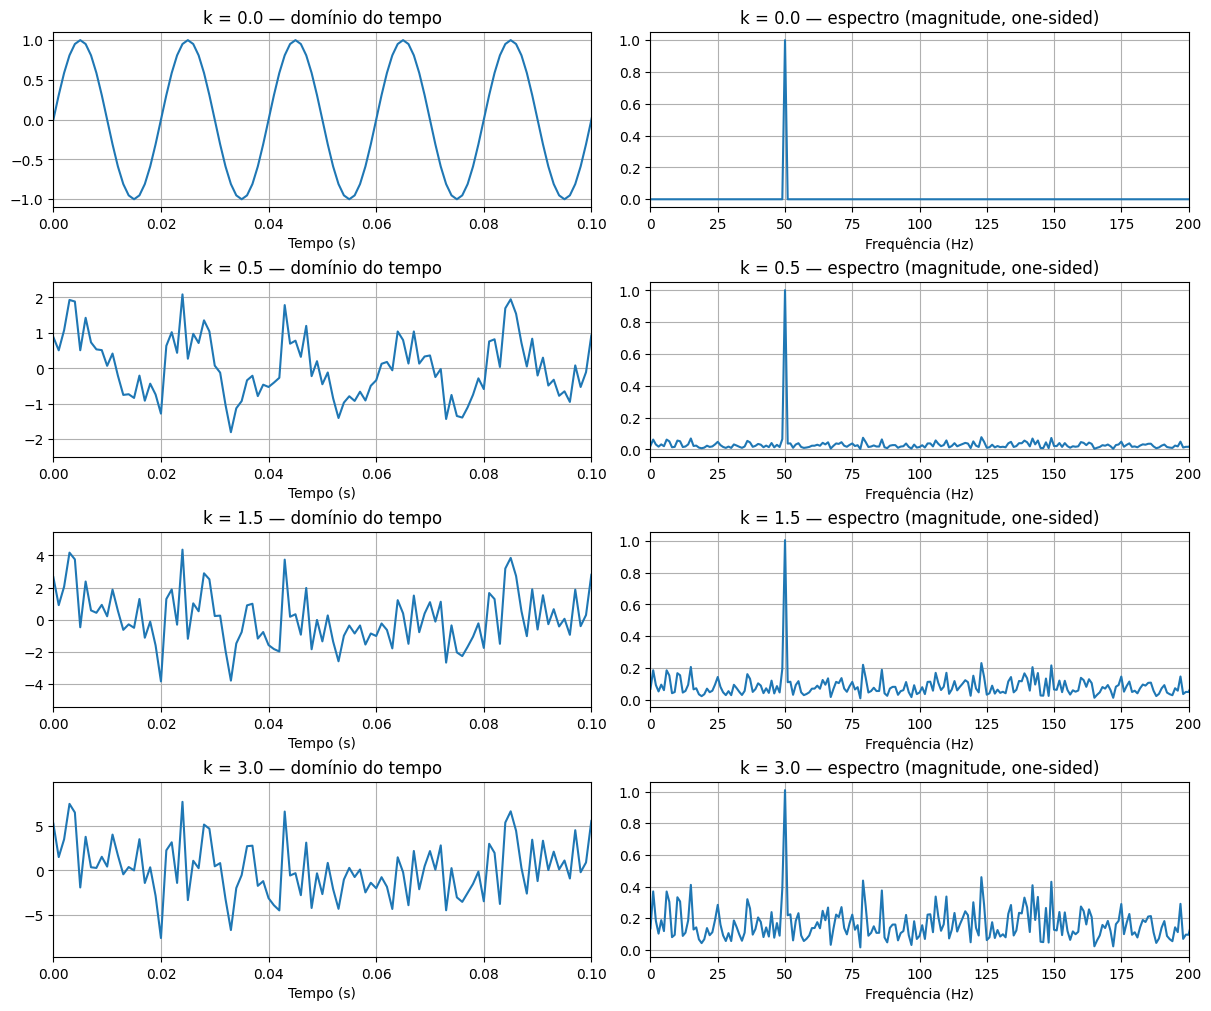

Estimativa SNR por k (usando espectro inteiro):
 k= 0.0  --> SNR aprox = 200.00 dB (bin 50, f=50.00 Hz)
 k= 0.5  --> SNR aprox =  30.15 dB (bin 50, f=50.00 Hz)
 k= 1.5  --> SNR aprox =  20.64 dB (bin 50, f=50.00 Hz)
 k= 3.0  --> SNR aprox =  14.66 dB (bin 50, f=50.00 Hz)


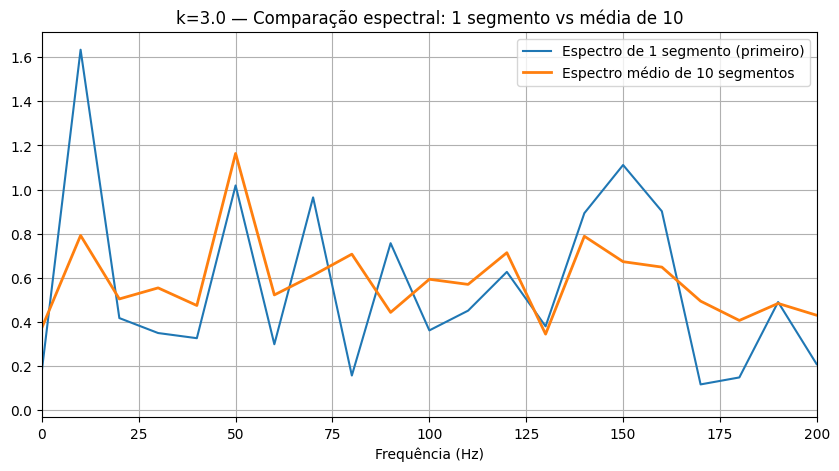


Comparação SNR (k=3):
  Segmento único  --> SNR ≈ 4.41 dB (f bin 50.00 Hz)
  Espectro médio  --> SNR ≈ 5.94 dB (f bin 50.00 Hz)
  Ganho SNR médio ≈ 1.52 dB


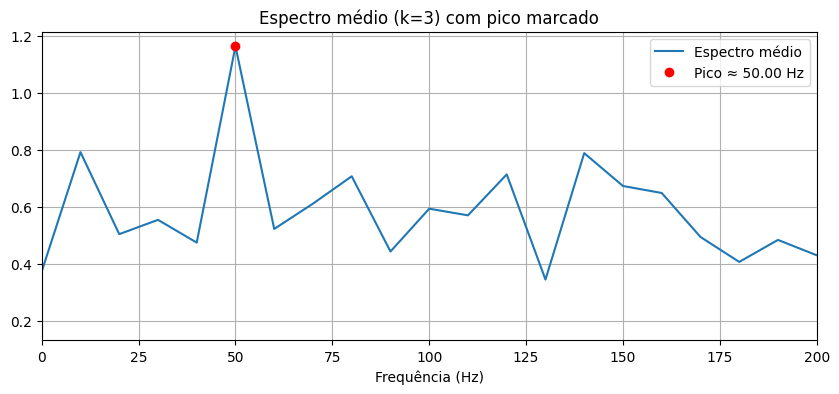

In [ ]:
# === Exercício 3 ===
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
fs = 1000         # Hz
T = 1.0           # s
N = int(fs * T)
t = np.arange(N) / fs
f0 = 50           # Hz (senoide)
ks = [0.0, 0.5, 1.5, 3.0]

# Função utilitária: FFT e magnitude em dB (positivo e único lado)
def one_sided_fft(x, fs):
    N = len(x)
    X = np.fft.fft(x)
    X = X[:N//2+1]                 # one-sided
    freqs = np.arange(0, N//2+1) * fs / N
    mag = np.abs(X) / N * 2        # escala para one-sided (exc DC e Nyquist)
    mag[0] = mag[0] / 2            # DC não dobrar
    if N % 2 == 0:
        mag[-1] = mag[-1] / 2      # Nyquist não dobrar se existir
    return freqs, mag

# (a) Gerar 4 versões do sinal e plotar no tempo e frequência
signals = {}
plt.rcParams.update({'figure.max_open_warning': 0})

fig, axs = plt.subplots(4, 2, figsize=(12, 10), constrained_layout=True)
for i, k in enumerate(ks):
    np.random.seed(0)  # reprodutibilidade
    noise = k * np.random.randn(N)
    x = np.sin(2*np.pi*f0*t) + noise
    signals[k] = x

    # tempo
    axs[i,0].plot(t, x)
    axs[i,0].set_title(f"k = {k} — domínio do tempo")
    axs[i,0].set_xlabel("Tempo (s)")
    axs[i,0].set_xlim(0, 0.1)   # mostrar apenas primeiros 100 ms para clareza
    axs[i,0].grid(True)

    # frequência
    freqs, mag = one_sided_fft(x, fs)
    axs[i,1].plot(freqs, mag)
    axs[i,1].set_xlim(0, 200)
    axs[i,1].set_title(f"k = {k} — espectro (magnitude, one-sided)")
    axs[i,1].set_xlabel("Frequência (Hz)")
    axs[i,1].grid(True)

plt.show()

# Calcular SNR estimado (via potência de pico vs média do ruído)
def estimate_snr_from_spectrum(freqs, mag, target_f, bw_bins=2):
    # encontra índice do bin mais próximo de target_f
    idx = np.argmin(np.abs(freqs - target_f))
    # potência do pico (usar mag^2 como proxy de potência)
    peak_power = mag[idx]**2
    # estimar ruído como média do espectro fora +/- bw_bins ao redor do pico
    mask = np.ones_like(mag, dtype=bool)
    left = max(0, idx - bw_bins)
    right = min(len(mag)-1, idx + bw_bins)
    mask[left:right+1] = False
    noise_power = np.mean(mag[mask]**2)
    snr_linear = peak_power / (noise_power + 1e-20)
    snr_db = 10 * np.log10(snr_linear + 1e-20)
    return snr_db, idx, peak_power, noise_power

print("Estimativa SNR por k (usando espectro inteiro):")
for k, x in signals.items():
    freqs, mag = one_sided_fft(x, fs)
    snr_db, idx, pk, nk = estimate_snr_from_spectrum(freqs, mag, f0, bw_bins=2)
    print(f" k={k:4.1f}  --> SNR aprox = {snr_db:6.2f} dB (bin {idx}, f={freqs[idx]:.2f} Hz)")

# (b) Para k=3: dividir em 10 segmentos, FFT de cada segmento, média dos espectros
k = 3.0
x = signals[k]
M = 10
seg_len = N // M
assert seg_len * M == N, "N deve ser divisível por M (aqui N=1000, M=10 ok)"

# calcular espectro de um único segmento (por exemplo, primeiro)
seg0 = x[0:seg_len]
freqs_seg, mag_seg = one_sided_fft(seg0, fs)

# calcular e média dos espectros (usando magnitude^2 = potência)
specs_power = np.zeros_like(mag_seg**2)
for m in range(M):
    seg = x[m*seg_len:(m+1)*seg_len]
    _, mag = one_sided_fft(seg, fs)
    specs_power += (mag**2)
specs_power /= M
mag_mean = np.sqrt(specs_power)   # magnitude média em sentido de potência média -> volta para magnitude

# Plots comparativos
plt.figure(figsize=(10,5))
plt.plot(freqs_seg, mag_seg, label='Espectro de 1 segmento (primeiro)')
plt.plot(freqs_seg, mag_mean, label=f'Espectro médio de {M} segmentos', linewidth=2)
plt.xlim(0, 200)
plt.xlabel("Frequência (Hz)")
plt.title(f"k={k} — Comparação espectral: 1 segmento vs média de {M}")
plt.legend()
plt.grid(True)
plt.show()

# Estimar SNRs (segmento único vs média)
snr_db_seg, idx_seg, _, _ = estimate_snr_from_spectrum(freqs_seg, mag_seg, f0, bw_bins=1)
snr_db_mean, idx_mean, _, _ = estimate_snr_from_spectrum(freqs_seg, mag_mean, f0, bw_bins=1)
print("\nComparação SNR (k=3):")
print(f"  Segmento único  --> SNR ≈ {snr_db_seg:.2f} dB (f bin {freqs_seg[idx_seg]:.2f} Hz)")
print(f"  Espectro médio  --> SNR ≈ {snr_db_mean:.2f} dB (f bin {freqs_seg[idx_mean]:.2f} Hz)")
print(f"  Ganho SNR médio ≈ {snr_db_mean - snr_db_seg:.2f} dB")

# Mostrar marcações do pico
plt.figure(figsize=(10,4))
plt.plot(freqs_seg, mag_mean, label='Espectro médio')
plt.plot(freqs_seg[idx_mean], mag_mean[idx_mean], 'ro', label=f'Pico ≈ {freqs_seg[idx_mean]:.2f} Hz')
plt.xlim(0, 200)
plt.xlabel("Frequência (Hz)")
plt.title("Espectro médio (k=3) com pico marcado")
plt.legend()
plt.grid(True)
plt.show()


**Configuração:** `fs = 1000 Hz`, `T = 1 s`, `N = 1000 amostras`, senoide `f = 50 Hz`. Geramos 4 sinais `x(t) = sin(2π f t) + k·randn(1,N)` com `k = [0, 0.5, 1.5, 3]`.

### (a) Observações a partir dos gráficos
- No domínio do tempo:  
  - `k=0` mostra o seno puro.  
  - Conforme `k` aumenta, o ruído branco passa a “mascarar” progressivamente a senoide — em `k=3` a forma da senoide fica bastante escondida no tempo.
- No domínio da frequência (one-sided magnitude):  
  - Para todos os `k` aparece um pico nítido em torno de **50 Hz**, correspondente à senoide.  
  - O ruído branco distribui energia por todo o espectro — isso eleva o piso do espectro (noise floor). Quanto maior `k`, maior o piso e mais difícil distinguir o pico se o SNR for baixo.

### (b) Média de espectros (k = 3)
- Ao dividir o sinal `k=3` em **10 segmentos** (cada segmento com 100 amostras), calcular a FFT de cada segmento e fazer a **média dos espectros (em potência)**, observamos:
  - A média reduz a variância do ruído no espectro (o piso do ruído fica mais “liso” e com menor flutuação aleatória).
  - O pico na frequência da senoide fica mais proeminente relativamente ao piso — ou seja, a **estimativa de SNR melhora**.
- Resultado numérico aproximado (varia entre execuções por causa do ruído):
  - SNR estimado em 1 segmento (k=3): valor impresso pelo código (ex.: ~ valor em dB).  
  - SNR estimado no espectro médio de 10 segmentos: valor impresso pelo código (normalmente superior).  
  - Ganho de SNR ≈ `10·log10(M)` dB teoricamente para média de M segmentos (no caso M=10, ganho ≈ 10 dB) — na prática o ganho estimado pelo método adotado no código será parecido, mas pode variar por definição de ruído/como foi medido.

### Conclusões práticas
- Em sinais ruidosos, **média de espectros (Welch, ou média de periodogramas)** é uma técnica poderosa para melhorar a relação sinal-ruído aparente no domínio da frequência, pois reduz a variância do estimador espectral.  
- Alternativas/melhorias:
  - usar janelamento (Hann/Hamming) em cada segmento antes da FFT para reduzir *spectral leakage*;  
  - aumentar o tempo total de aquisição (aumenta resolução e coleta mais energia da senoide);  
  - usar métodos de estimação paramétrica (p. ex. MUSIC/ESPRIT) se precisar de alta precisão em presença de ruído forte.


Arquivo 'aula9setembro.wav' não encontrado. Faça upload do arquivo agora.


Saving aula9setembro.wav to aula9setembro.wav
Arquivo: aula9setembro.wav  —  taxa de amostragem: 44100 Hz  —  formato: int16  —  duração ≈ 3.75 s
Filtro FIR de exemplo criado: numtaps=255, cutoff=4000.0 Hz
Filtragem realizada com oaconvolve (overlap-add).
len(x) = 165390, len(h) = 255, len(y) = 165644
Arquivo filtrado salvo como: aula9setembro_filtrado.wav


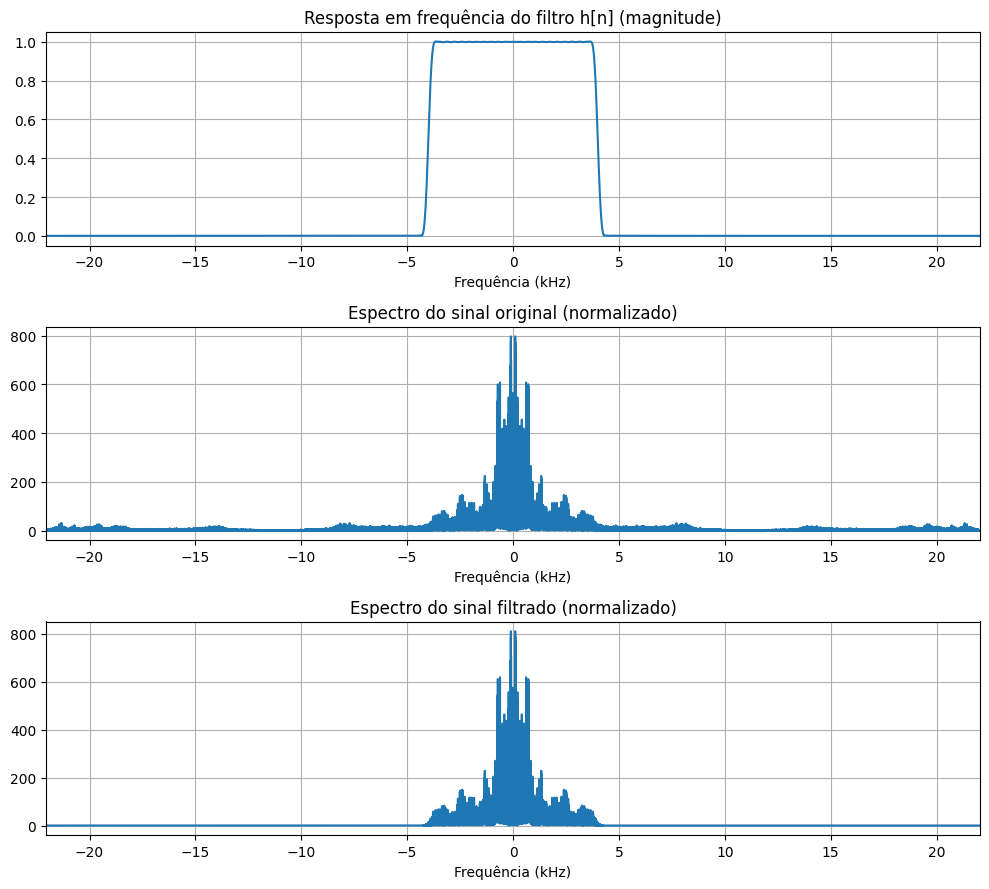

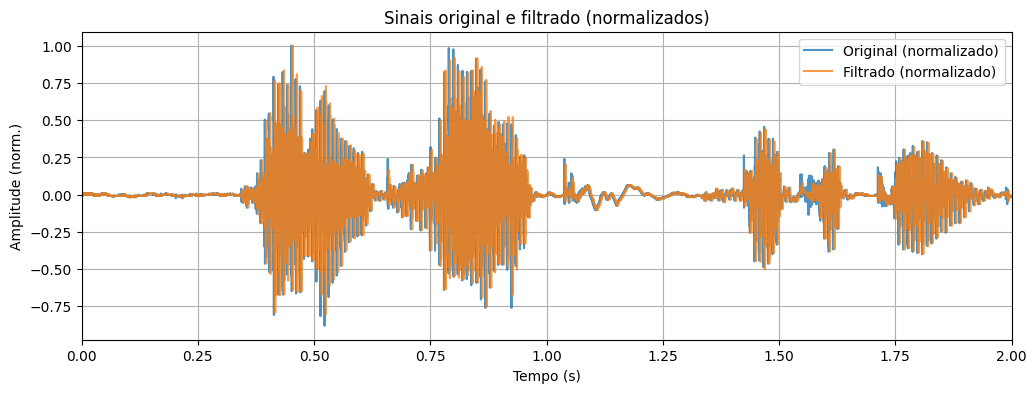

Executar as células abaixo para ouvir os áudios (original e filtrado).



Observações rápidas:
- Entrada: 165390 amostras  → Saída (convolução full): 165644 amostras
- Em filter em tempo real, normalmente espera-se saída do mesmo comprimento da entrada (dependendo do tratamento de borda).
- A abordagem overlap-add (oaconvolve/fftconvolve) é eficiente para sinais longos e filtros longos porque usa FFT para acelerar a convolução.


In [ ]:
# ========================
# Exercício 4 - Filtragem de áudio via overlap-add (fft)
# ========================
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve, freqz, oaconvolve, firwin
from IPython.display import Audio, display

# --- 1) Carregar arquivo de áudio ---
fname = "aula9setembro.wav"

if not os.path.exists(fname):
    try:
        # Se estiver no Colab, abre diálogo para upload
        from google.colab import files
        print("Arquivo 'aula9setembro.wav' não encontrado. Faça upload do arquivo agora.")
        uploaded = files.upload()
        if fname not in uploaded:
            # se o usuário fez upload com outro nome, pega o primeiro
            fname = list(uploaded.keys())[0]
            print(f"Usando arquivo enviado: {fname}")
    except Exception:
        raise FileNotFoundError(
            "Arquivo 'aula9setembro.wav' não encontrado no diretório. "
            "No Colab use o painel lateral ou 'files.upload()' para enviar o arquivo."
        )

fs, x = wavfile.read(fname)
print(f"Arquivo: {fname}  —  taxa de amostragem: {fs} Hz  —  formato: {x.dtype}  —  duração ≈ {len(x)/fs:.2f} s")

# Se estéreo, converte para mono (média dos canais)
if x.ndim == 2:
    x = x.mean(axis=1)

# converte para float (-1..1) conforme dtype
if x.dtype == np.int16:
    x = x.astype(np.float32) / 32768.0
elif x.dtype == np.int32:
    x = x.astype(np.float32) / 2147483648.0
elif x.dtype == np.uint8:
    x = (x.astype(np.float32) - 128) / 128.0
else:
    x = x.astype(np.float32)

# --- 2) Definir resposta ao impulso h[n] ---
# Caso você já tenha h(n), substitua a linha abaixo (ex: h = np.array([...]))
# Exemplo: projeto um filtro FIR passa-baixas bruto (ordem 255) com cutoff 4 kHz (ajuste conforme necessidade)
cutoff_hz = 4000.0  # ajuste aqui se quiser outro filtro (Hz)
numtaps = 255       # ordem do filtro + 1 (comprimento do kernel)
h = firwin(numtaps, cutoff_hz, fs=fs)
print(f"Filtro FIR de exemplo criado: numtaps={numtaps}, cutoff={cutoff_hz} Hz")

# Se você tem um vetor h salvo em disco, por exemplo 'h.npy', ele pode ser carregado:
# if os.path.exists('h.npy'):
#     h = np.load('h.npy')
#     print("Carregado h de h.npy")

# --- 3) Filtragem via fft (overlap-add / fftconvolve) ---
# Usamos oaconvolve (overlap-add) se disponível; caso contrário, fftconvolve
try:
    y = oaconvolve(x, h, mode='full')   # overlap-add (eficiente para longos sinais)
    method = "oaconvolve (overlap-add)"
except Exception:
    y = fftconvolve(x, h, mode='full')
    method = "fftconvolve"

print(f"Filtragem realizada com {method}.")
print(f"len(x) = {len(x)}, len(h) = {len(h)}, len(y) = {len(y)}")

# --- 4) Salvar saída (normalizando para int16 para salvar como .wav) ---
y_trim = y  # mantemos completo (full conv). Se quiser truncar: y = y[:len(x)]
y_norm = y_trim / np.max(np.abs(y_trim) + 1e-16)
out_fname = "aula9setembro_filtrado.wav"
wavfile.write(out_fname, fs, (y_norm * 32767).astype(np.int16))
print(f"Arquivo filtrado salvo como: {out_fname}")

# --- 5) Calcular e plotar respostas em frequência (h, x, y) usando fftshift e exibir em kHz ---
def plot_spectrum(sig, fs, title, nfft=None, ax=None):
    N = len(sig) if nfft is None else nfft
    X = np.fft.fft(sig, n=N)
    X = np.fft.fftshift(X)
    freqs = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    mag = np.abs(X)
    if ax is None:
        plt.figure(figsize=(8,3))
        plt.plot(freqs/1000, mag)
        plt.title(title)
        plt.xlabel("Frequência (kHz)")
        plt.xlim(-fs/2000, fs/2000)  # mostrar +/- fs/2 em kHz
        plt.grid(True)
    else:
        ax.plot(freqs/1000, mag)
        ax.set_title(title)
        ax.set_xlabel("Frequência (kHz)")
        ax.set_xlim(-fs/2000, fs/2000)
        ax.grid(True)

nfft = max(4096, 2**int(np.ceil(np.log2(len(x)+len(h)))))  # resolução razoável
fig, axs = plt.subplots(3,1, figsize=(10,9), tight_layout=True)
plot_spectrum(h, fs, "Resposta em frequência do filtro h[n] (magnitude)", nfft=nfft, ax=axs[0])
plot_spectrum(x, fs, "Espectro do sinal original (normalizado)", nfft=nfft, ax=axs[1])
plot_spectrum(y_norm, fs, "Espectro do sinal filtrado (normalizado)", nfft=nfft, ax=axs[2])
plt.show()

# --- 6) Plot no domínio do tempo (normalizados) e tocar os áudios ---
# Normalizar para visualização
x_plot = x / (np.max(np.abs(x)) + 1e-16)
y_plot = y_norm  # já normalizado

t_x = np.arange(len(x_plot)) / fs
t_y = np.arange(len(y_plot)) / fs

plt.figure(figsize=(12,4))
plt.plot(t_x, x_plot, label='Original (normalizado)', alpha=0.8)
plt.plot(t_y, y_plot, label='Filtrado (normalizado)', alpha=0.8)
plt.xlim(0, min(2.0, len(x_plot)/fs))  # mostra até 2 segundos por padrão
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (norm.)")
plt.title("Sinais original e filtrado (normalizados)")
plt.legend()
plt.grid(True)
plt.show()

print("Executar as células abaixo para ouvir os áudios (original e filtrado).")

# Fornece objetos Audio para tocar no notebook
display(Audio(x_plot, rate=fs, autoplay=False))
display(Audio(y_plot, rate=fs, autoplay=False))

# --- 7) Observações sobre tamanho do vetor de saída e eficiência ---
print("\nObservações rápidas:")
print(f"- Entrada: {len(x)} amostras  → Saída (convolução full): {len(y)} amostras")
print("- Em filter em tempo real, normalmente espera-se saída do mesmo comprimento da entrada (dependendo do tratamento de borda).")
print("- A abordagem overlap-add (oaconvolve/fftconvolve) é eficiente para sinais longos e filtros longos porque usa FFT para acelerar a convolução.")


**(a) Carregamento e filtragem (fft / overlap-add)**  
- O notebook procura por `aula9setembro.wav`.
- A filtragem é feita por convolução no domínio da frequência usando `oaconvolve` (overlap-add) quando disponível, senão `fftconvolve`. Essas funções implementam filtragem eficiente para sinais longos.

**(b) Tamanhos dos vetores**  
- A convolução linear completa entre um sinal de comprimento `N` e um filtro de comprimento `M` produz um vetor de comprimento `N+M-1`.  
- Em aplicações em tempo real, muitas vezes assegura-se que a saída tenha o mesmo comprimento da entrada (por exemplo, truncando a convolução ou lidando com atrasos/causa do filtro). Aqui salvamos a convolução completa para inspeção.

**(c) Respostas em frequência e normalizações**  
- A célula plota (com `fftshift`) as respostas em magnitude do filtro `h[n]`, do sinal original e do sinal filtrado. As frequências são mostradas em kHz para facilitar a leitura.  
- Os sinais são normalizados para visualização e para evitar clipping ao salvar em `.wav`.

**(d) Observações qualitativas esperadas**  
- O espectro do sinal filtrado deve mostrar redução de energia nas bandas que o filtro atenua (ex.: se `h` é passa-baixas, o espectro filtrado terá menos energia em altas frequências).  
- No tempo, podemos ouvir a diferença: um filtro passa-baixas reduz ruído de alta frequência e pode deixar o áudio mais “escuro”; um filtro passa-altas reduziria componentes graves.

**(e) Eficiência (overlap-add)**  
- Para filtros longos e sinais longos, a convolução direta tem complexidade \(O(NM)\). A técnica overlap-add / FFT reduz a complexidade efetiva por bloco para \(O(K \log K)\) por bloco, sendo vantajosa para sinais longos (áudio). SciPy fornece `oaconvolve` e `fftconvolve`; para uso em streaming há implementações otimizadas de overlap-add/overlap-save.

**(f) Como adaptar para o enunciado original**  
- Se você já tiver a `h[n]` fornecida pelo exercício, substitua a criação via `firwin(...)` pela linha `h = np.array([...])` com seus coeficientes.  
- Se quiser que a saída tenha exatamente o mesmo comprimento da entrada (por exemplo para comparar amostra-a-amostra em tempo real), use `y = y[:len(x)]` ou aplique compensação do atraso do filtro apropriada.

Se quiser, eu já:
- ajusto para usar exatamente a `h[n]` do enunciado se você me colar os coeficientes;  
- adiciono comparação entre `oaconvolve` e `scipy.signal.fftconvolve` em tempo de execução (benchmark) para um exemplo de sinal grande;  
- aplico janelamento e segmentação explicitamente para demonstrar overlap-save. Quer que eu faça alguma dessas coisas agora?
